In [1]:
import pandas as pd                                                                                                      #for using data in the form of dataframes
import numpy as np
import re                                                                                                                #for data manipulation when cleaning datasets
import os

#---Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tick_list =  ['AMC', 'DKNG', 'TSLA', 'AMD', 'BABA']
reddit_df_dict = {tick: pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Reddit\\consolidated_pickle_files\\reddit_{tick}_df_for_BERT.pkl") for tick in tick_list}
twitter_df_dict = {tick: pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Twitter\\consolidated_pickle_files\\twitter_{tick}_df_for_BERT.pkl") for tick in tick_list}
tick_df_dict = {tick: pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\{tick}_technical_data_df.pkl") for tick in tick_list}

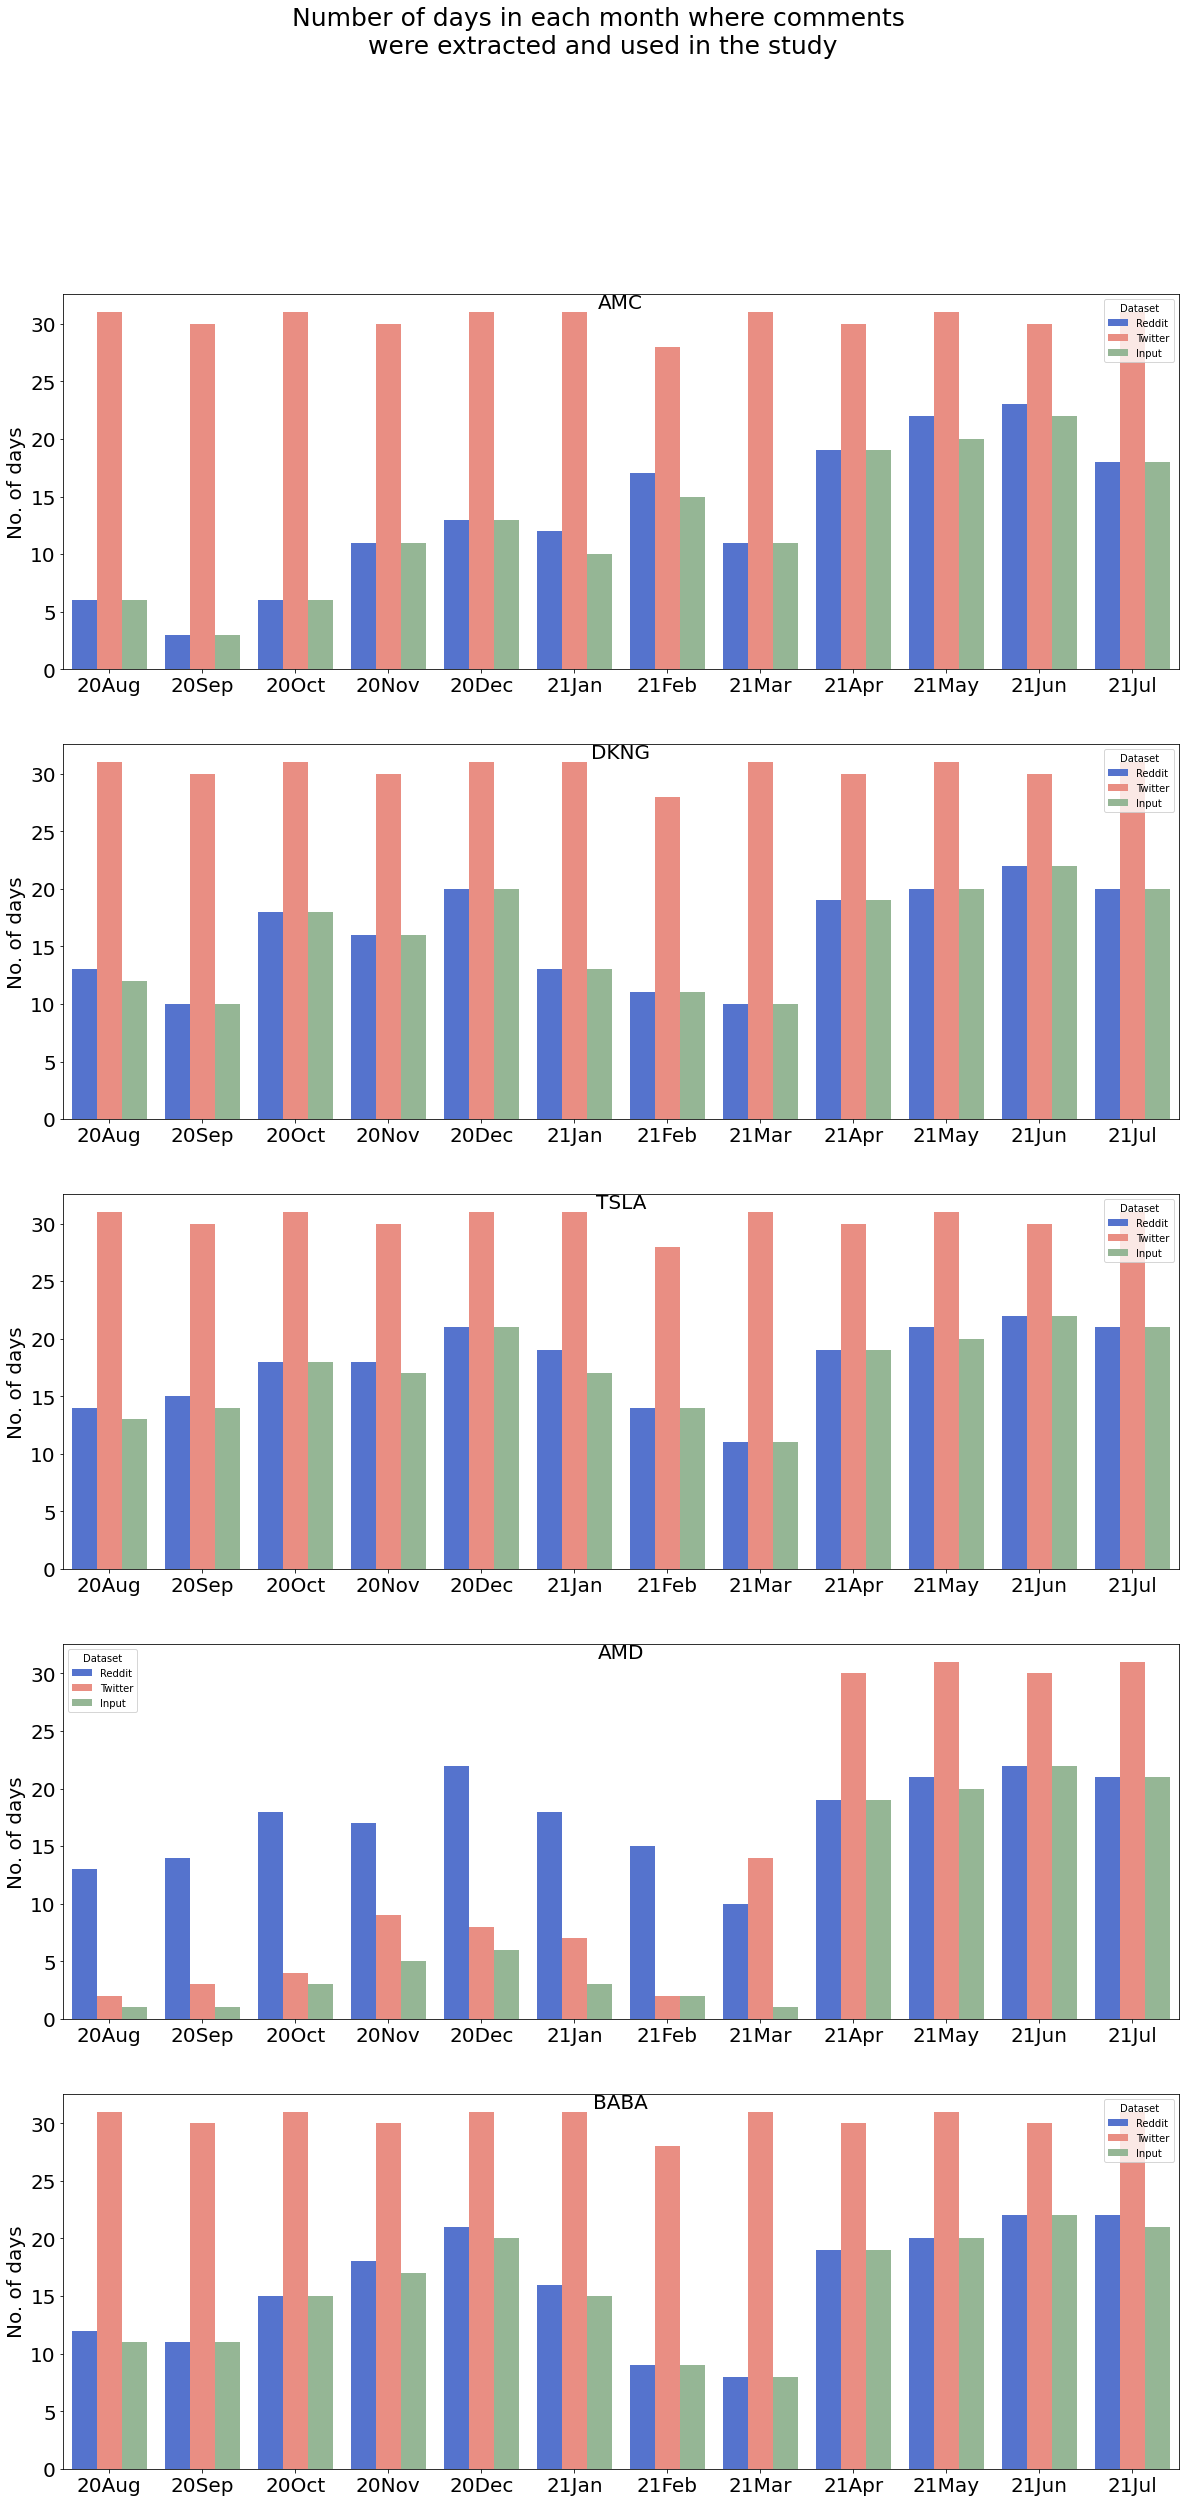

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(20, 40))
fig.suptitle('Number of days in each month where comments \nwere extracted and used in the study', fontsize=25, fontweight=5)

ax = fig.subplots(nrows=len(tick_list), ncols=1)
ax_i=0

for tick in tick_list:
    tmp_reddit = reddit_df_dict[tick].copy(deep=True)
    tmp_reddit_grouped = tmp_reddit.groupby(['year','month'], as_index=False)['YearMonDay'].nunique()
    
    #create a column with datetime format so that we can sort the data properly according to year and month
    tmp_reddit_grouped['Datetime'] = tmp_reddit_grouped['year'].astype('str')+tmp_reddit_grouped['month']
    tmp_reddit_grouped['Datetime'] = pd.to_datetime(tmp_reddit_grouped['Datetime'], format="%y%b")
    tmp_reddit_grouped = tmp_reddit_grouped.sort_values(by='Datetime')
    tmp_reddit_grouped['Year-Month'] = tmp_reddit_grouped['year'].astype('str') + tmp_reddit_grouped['month']
    tmp_reddit_grouped['Dataset'] = 'Reddit'
    tmp_reddit_grouped = tmp_reddit_grouped[(tmp_reddit_grouped['Datetime'] >= '2020-08-01') & (tmp_reddit_grouped['Datetime'] < '2021-08-01')]
    
    
    tmp_twitter = twitter_df_dict[tick].copy(deep=True)
    tmp_twitter_grouped = tmp_twitter.groupby(['year','month'], as_index=False)['YearMonDay'].nunique()
    
    #create a column with datetime format so that we can sort the data properly according to year and month
    tmp_twitter_grouped['Datetime'] = tmp_twitter_grouped['year'].astype('str')+tmp_twitter_grouped['month']
    tmp_twitter_grouped['Datetime'] = pd.to_datetime(tmp_twitter_grouped['Datetime'], format="%y%b")
    tmp_twitter_grouped = tmp_twitter_grouped.sort_values(by='Datetime')
    tmp_twitter_grouped['Year-Month'] = tmp_twitter_grouped['year'].astype('str') + tmp_twitter_grouped['month']
    tmp_twitter_grouped['Dataset'] = 'Twitter'
    tmp_twitter_grouped = tmp_twitter_grouped[(tmp_twitter_grouped['Datetime'] >= '2020-08-01') & (tmp_twitter_grouped['Datetime'] < '2021-08-01')]
    
    tmp_combined = pd.concat([tmp_reddit_grouped[['Year-Month','Dataset','YearMonDay']], tmp_twitter_grouped[['Year-Month','Dataset','YearMonDay']]], ignore_index=True)
    
    tmp_tick = tick_df_dict[tick].copy(deep=True)
    merged_dataset = pd.merge(pd.merge(tmp_reddit[['YearMonDay']], tmp_twitter[['YearMonDay']], how="inner", on="YearMonDay"), tmp_tick, on='YearMonDay')
    
    merged_dataset['year'] = merged_dataset['YearMonDay'].str[:2]
    merged_dataset['month'] = merged_dataset['YearMonDay'].str[2:5]
    tmp_tick_grouped = merged_dataset.groupby(['year','month'], as_index=False)['YearMonDay'].nunique()
    
    #create a column with datetime format so that we can sort the data properly according to year and month
    tmp_tick_grouped['Datetime'] = tmp_tick_grouped['year'].astype('str')+tmp_tick_grouped['month']
    tmp_tick_grouped['Datetime'] = pd.to_datetime(tmp_tick_grouped['Datetime'], format="%y%b")
    tmp_tick_grouped = tmp_tick_grouped.sort_values(by='Datetime')
    tmp_tick_grouped['Year-Month'] = tmp_tick_grouped['year'].astype('str') + tmp_tick_grouped['month']  
    tmp_tick_grouped['Dataset'] = 'Input'
    tmp_tick_grouped = tmp_tick_grouped[(tmp_tick_grouped['Datetime'] >= '2020-08-01') & (tmp_tick_grouped['Datetime'] < '2021-08-01')]
    
    final_dataset = pd.concat([tmp_combined[['Year-Month','Dataset','YearMonDay']], tmp_tick_grouped[['Year-Month','Dataset','YearMonDay']]], ignore_index=True)
    
    sns.barplot(x='Year-Month', y='YearMonDay', hue='Dataset', data=final_dataset, ax=ax[ax_i], palette=['royalblue','salmon','darkseagreen'])
    ax[ax_i].set_title(f'{tick}', pad=-14, y=1, fontsize=20)
    ax[ax_i].tick_params(axis='y', which='major', labelsize=20)
    ax[ax_i].tick_params(axis='x', which='major', labelsize=20)
    ax[ax_i].set_xlabel('')
    ax[ax_i].set_ylabel('No. of days', fontsize=20)
    ax_i+=1   
    
path = r'C:\\Users\\Karthik\\Desktop\\Dissertation\\Plots and metrics\\'
plt.savefig(f'{path}Dataset Counts per month.jpg')
plt.show();